## Problem Statement:

Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.  

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('salary.csv')

In [3]:
data.head(pd.set_option('display.max_columns',None))

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape # Checking shape of data

(149481, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGENCY,149481.0,545.736288,139.057691,101.0,529.00,530.00,696.00,9.300000e+02
HRLY RATE,149481.0,0.346488,4.211485,0.0,0.00,0.00,0.00,1.177885e+02
HRS PER WK,149481.0,39.714918,2.323855,1.0,40.00,40.00,40.00,7.000000e+01
MONTHLY,149481.0,4226.184248,2093.111691,50.0,3019.84,3720.17,4865.81,4.612500e+04
ANNUAL,149481.0,50714.210973,25117.340292,600.0,36238.08,44642.04,58389.72,5.535000e+05
STATE NUMBER,149481.0,565193.023521,478621.220542,1.0,113334.00,346373.00,1100500.00,1.271604e+06
multiple_full_time_jobs,14.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.000000e+00
summed_annual_salary,16.0,74303.955000,51925.944282,18000.0,32962.50,48063.30,123751.77,1.713834e+05


Standard deviation of multiple_full_time_jobs is 0. So we can remove it

In [7]:
data.describe(include='O').T

,count,unique,top,freq
AGENCY NAME,149481,113,HEALTH AND HUMAN SERVICES COMMISSION ...,36667
LAST NAME,149481,38675,SMITH,1243
FIRST NAME,149481,23559,MICHAEL,1843
MI,149481,27,,38408
CLASS CODE,149481,1481,4504,9267
CLASS TITLE,149481,1422,CORREC OFFICER IV ...,9267
ETHNICITY,149481,6,WHITE,67142
GENDER,149481,2,FEMALE,85328
STATUS,149481,11,CRF - CLASSIFIED REGULAR FULL-TIME,142502
EMPLOY DATE,149481,6295,09/01/17,12359


In [8]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [9]:
data.rename({'AGENCY NAME':'AGENCY_NAME','LAST NAME':'LAST_NAME','FIRST NAME':'FIRST_NAME',
             'CLASS CODE':'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE',
             'HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK', 'STATE NUMBER':'STATE_NUMBER'},axis=1,inplace=True)

In [10]:
data.head(4)

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True


In [11]:
data1=data.copy()

### Data Preprocessing:

In [63]:
data1.head()

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [64]:
data1.isnull().sum()

AGENCY                          0
AGENCY_NAME                     0
LAST_NAME                       0
FIRST_NAME                      0
MI                              0
CLASS_CODE                      0
CLASS_TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY_DATE                     0
HRLY_RATE                       0
HRS_PER_WK                      0
MONTHLY                         0
ANNUAL                          0
STATE_NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

### Data Visualization:

<Axes: >

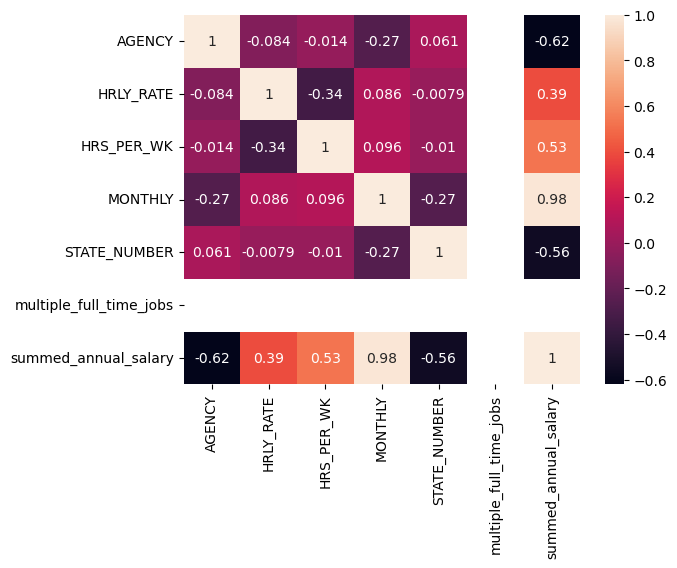

In [65]:
sns.heatmap(data=data1.drop(['ANNUAL'],axis=1).corr(),annot=True)

multiple_full_time_jobs is highly correlated with every other feature.<br>
MONTHLY and summed_annual_salary high correlated with each other.

In [66]:
data1.drop(['AGENCY','LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE','duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],axis=1,inplace=True)
data1.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [67]:
# AGENCY is a code given to AGENCY_NAME so it does not make sense in prediction,so dropped it.
# also LAST_NAME, FIRST_NAME, MI,CLASS_CODE doesnot make sense in prediction hence those are removed.
# duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search have more than 95% of them are null values,hence ignored them.

In [68]:
data2=data1.drop(['ANNUAL','EMPLOY_DATE'],axis=1) # For visualization of data dropping those 2 columns 
data2.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,STATE_NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,59115
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,165030


#### Univariate analysis:

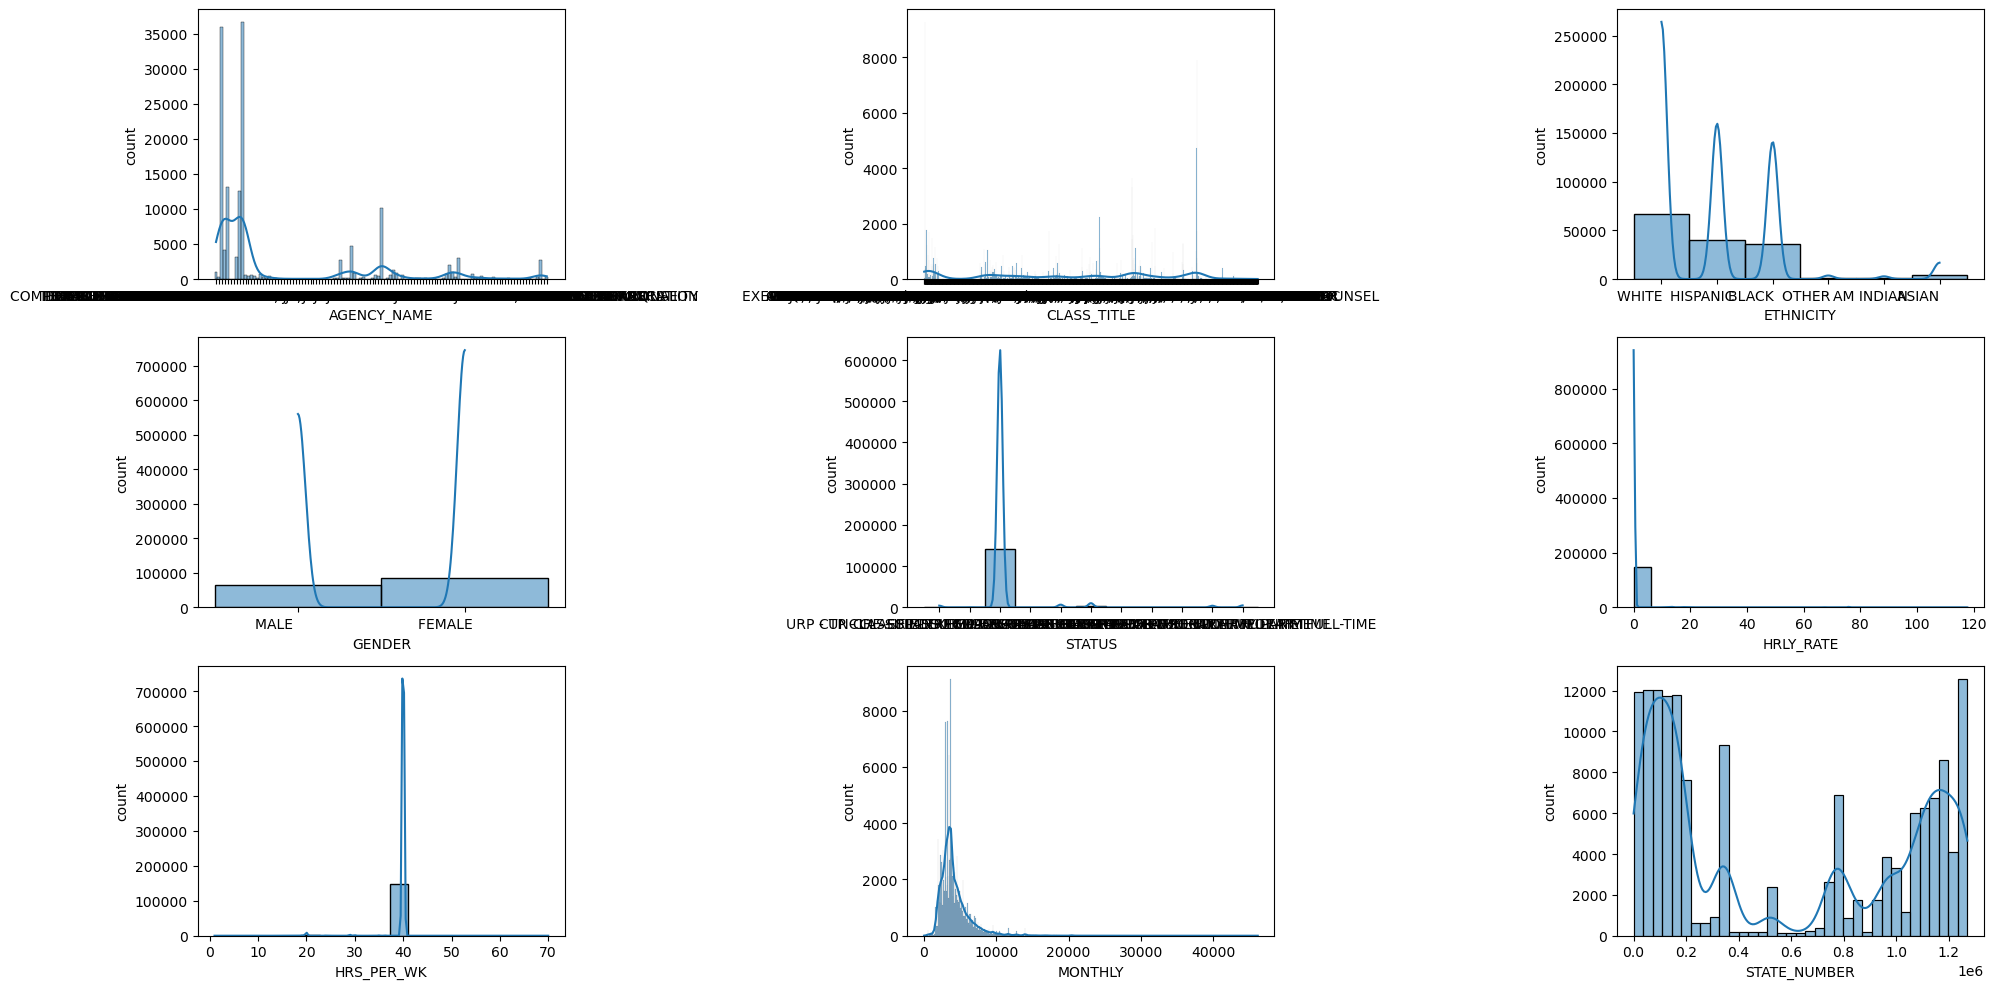

In [69]:
# Check for distribution of data
plt.figure(figsize=(20,10),facecolor="white")
plotnumber=1
for column in data2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data2[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [70]:
# There is no proper distribution in AGENCY_NAME and CLASS_TITLE.
# Status and HRS_ PER_WEEK is having normal distribution.
# HRLY_ RATE and MONTHLY is having left skewed distribution.

#### Bivariate analysis:

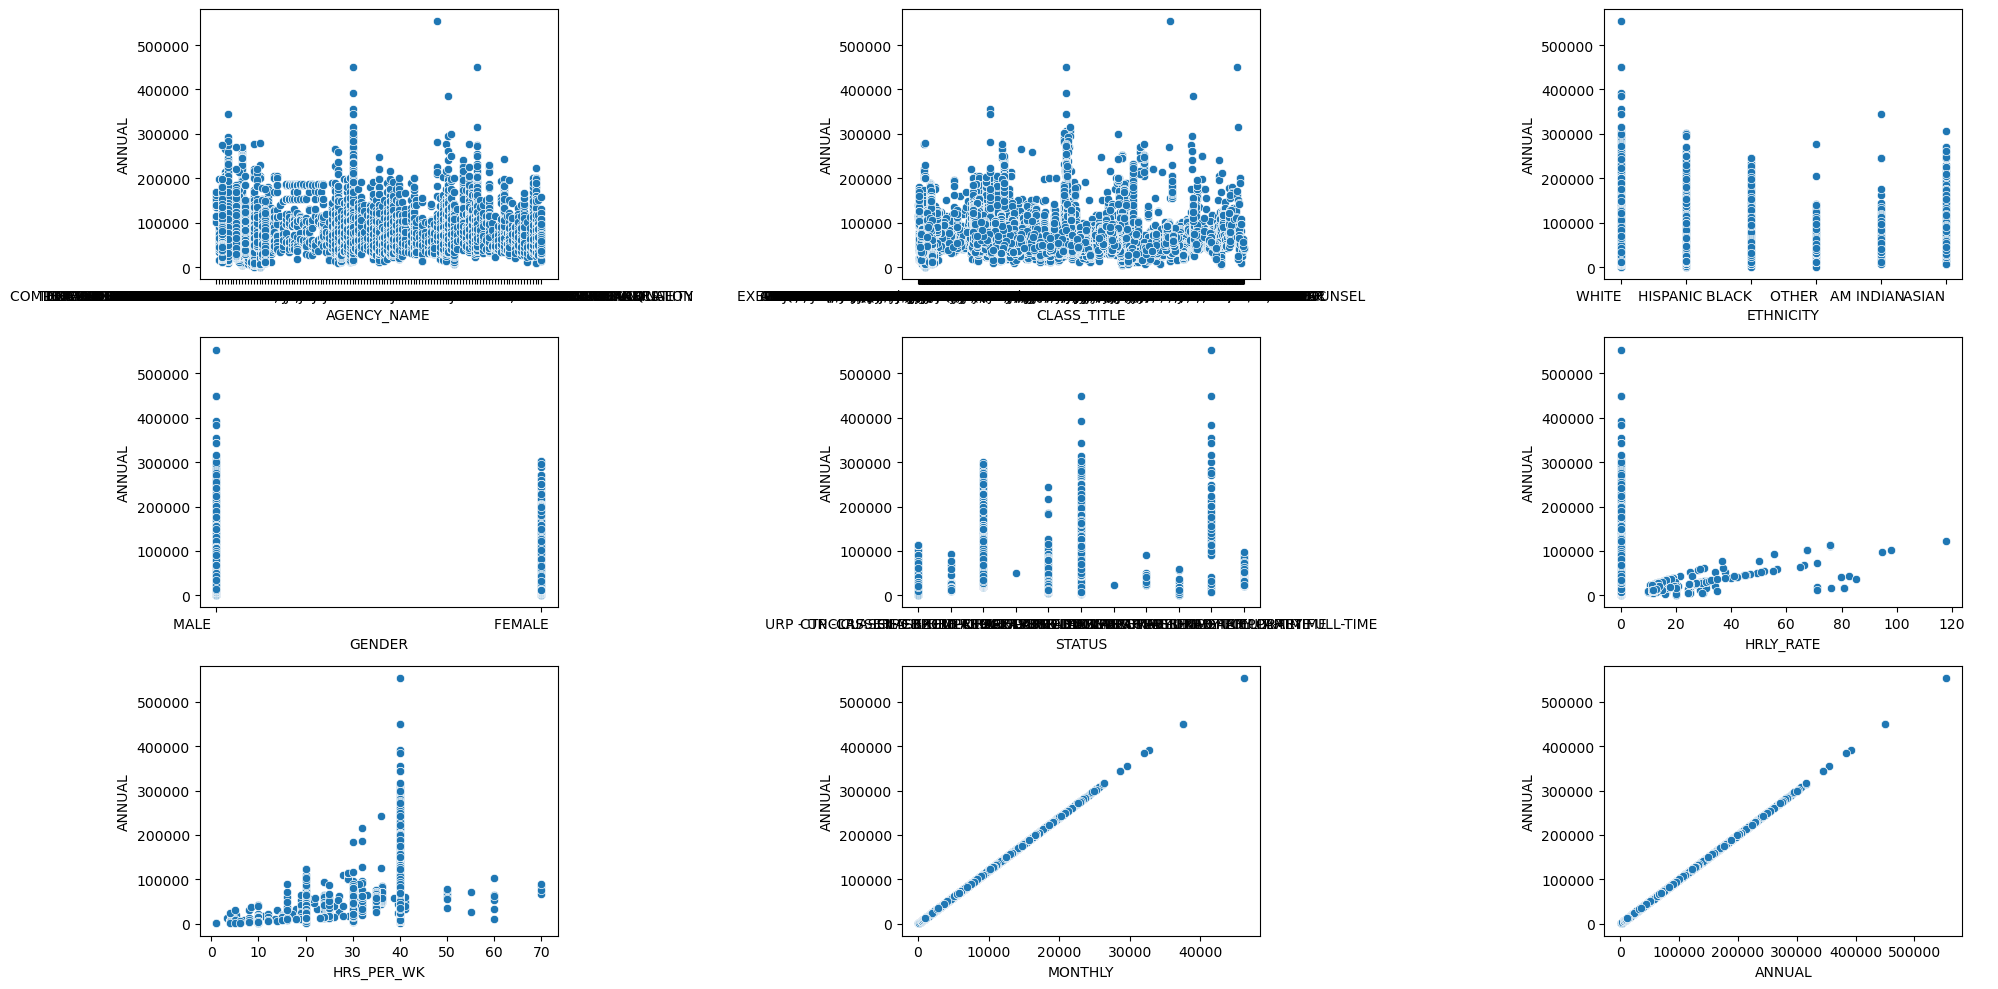

In [71]:
plt.figure(figsize=(20,10),facecolor="white")
plotnumber=1
for column in data1.drop('EMPLOY_DATE',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=data1[column],y='ANNUAL',data=data1)
    plotnumber+=1
plt.tight_layout()

In [72]:
# MONTHLY is linear trend with ANNUAL also MONTHLY and ANNUAL columns are highly correlated to each other.so droped it

In [73]:
data1.drop(['MONTHLY'],axis=1,inplace=True)

In [74]:
# Handling EMPLOY_DATE

In [75]:
data1['EMPLOY_DATE'] = pd.to_datetime(data1['EMPLOY_DATE'])
data1['EMPLOY_YEAR']=pd.to_datetime(data1['EMPLOY_DATE']).dt.year

In [76]:
data1['CURRENT_YEAR']=dt.datetime.combine(dt.date.today(), dt.datetime.min.time())

In [77]:
data1['YEARS']=((data1.CURRENT_YEAR)-(data1.EMPLOY_DATE)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)

In [78]:
data1.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,EMPLOY_YEAR,CURRENT_YEAR,YEARS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,114549.84,127717,1988,2024-01-18,35.939726
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,16857.24,127717,2015,2024-01-18,8.967123
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,114549.84,59115,2020,2024-01-18,3.964384
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,16857.24,59115,2018,2024-01-18,5.383562
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,39411.24,165030,2020,2024-01-18,3.556164


In [79]:
data1.YEARS.max()

48.413698630136984

In [80]:
data1.YEARS.min()

-49.679452054794524

In [81]:
Negative_val=data1.loc[data1['YEARS']<0]

In [82]:
Negative_val

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,EMPLOY_YEAR,CURRENT_YEAR,YEARS
20904,DEPARTMENT OF PUBLIC SAFETY ...,"SERGEANT, DPS ...",WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2071-10-06,0.0,40.0,86494.92,171968,2071,2024-01-18,-47.747945
88771,TEXAS DEPARTMENT OF TRANSPORTATION ...,ADMINISTRATIVE ASST II ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2072-08-01,0.0,40.0,40661.28,100209,2072,2024-01-18,-48.569863
92736,TEXAS DEPARTMENT OF TRANSPORTATION ...,PROGRAM SPECIALIST III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2073-09-10,0.0,40.0,68796.00,180353,2073,2024-01-18,-49.679452
116978,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,AGRICULTURE SPEC V ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2069-07-14,0.0,40.0,48404.88,68427,2069,2024-01-18,-45.517808
141891,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIAL ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2069-01-14,0.0,40.0,7200.00,116511,2069,2024-01-18,-45.021918
142425,HOUSE OF REPRESENTATIVES ...,ELECTED OFFICIAL ...,BLACK,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2073-01-09,0.0,40.0,7200.00,6963,2073,2024-01-18,-49.010959
148921,SOIL AND WATER CONSERVATION BOARD ...,PROGRAM SPECIALIST VII ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2068-12-01,0.0,40.0,91900.92,96871,2068,2024-01-18,-44.901370


In [83]:
data1.drop(Negative_val.index,inplace=True)

In [84]:
data1.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,EMPLOY_YEAR,CURRENT_YEAR,YEARS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1988-02-18,75.96150,29.0,114549.84,127717,1988,2024-01-18,35.939726
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2015-02-01,81.04454,4.0,16857.24,127717,2015,2024-01-18,8.967123
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2020-02-01,75.96150,29.0,114549.84,59115,2020,2024-01-18,3.964384
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,2018-09-01,81.04453,4.0,16857.24,59115,2018,2024-01-18,5.383562
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,0.00000,40.0,39411.24,165030,2020,2024-01-18,3.556164


In [85]:
data1.drop(['EMPLOY_DATE','EMPLOY_YEAR','CURRENT_YEAR'],inplace=True,axis=1)

In [86]:
data1.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,YEARS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,127717,35.939726
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,16857.24,127717,8.967123
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,114549.84,59115,3.964384
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,16857.24,59115,5.383562
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,39411.24,165030,3.556164


### Categorical Encoding:

In [87]:
data1.ETHNICITY.value_counts()

WHITE              67136
HISPANIC           40585
BLACK              35852
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: ETHNICITY, dtype: int64

In [88]:
data1.GENDER.value_counts()

FEMALE             85325
MALE               64149
Name: GENDER, dtype: int64

In [89]:
data1.STATUS.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME          142497
URF - UNCLASSIFIED REGULAR FULL-TIME          2361
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: STATUS, dtype: int64

In [90]:
# Labelencoding on ETHNICITY,GENDER,STATUS

In [91]:
lc=LabelEncoder()
data1.ETHNICITY=lc.fit_transform(data1.ETHNICITY)
data1.GENDER=lc.fit_transform(data1.GENDER)
data1.STATUS=lc.fit_transform(data1.STATUS)

In [92]:
data1.head()

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,ANNUAL,STATE_NUMBER,YEARS
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",5,1,8,75.96150,29.0,114549.84,127717,35.939726
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,5,1,4,81.04454,4.0,16857.24,127717,8.967123
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",5,1,8,75.96150,29.0,114549.84,59115,3.964384
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,5,1,4,81.04453,4.0,16857.24,59115,5.383562
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,3,0,0,0.00000,40.0,39411.24,165030,3.556164


In [93]:
# one hot encoding on remaining columns means AGENCY_NAME and CLASS_TITLE

In [94]:
data1=pd.get_dummies(data1,drop_first= False)

In [95]:
data1.head()

ETHNICITY  GENDER  STATUS  HRLY_RATE  HRS_PER_WK     ANNUAL  STATE_NUMBER  \
0          5       1       8   75.96150        29.0  114549.84        127717   
1          5       1       4   81.04454         4.0   16857.24        127717   
2          5       1       8   75.96150        29.0  114549.84         59115   
3          5       1       4   81.04453         4.0   16857.24         59115   
4          3       0       0    0.00000        40.0   39411.24        165030   

       YEARS  AGENCY_NAME_ALCOHOLIC BEVERAGE COMMISSION                       \
0  35.939726                                                  0                
1   8.967123                                                  0                
2   3.964384                                                  0                
3   5.383562                                                  0                
4   3.556164                                                  0                

   AGENCY_NAME_BOARD OF ARCHITECTURAL EXAMINERS                    \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF CHIROPRACTIC EXAMINERS                     \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF DENTAL EXAMINERS                           \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF EXAMINERS OF PSYCHOLOGISTS                 \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF NURSE EXAMINERS                            \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF PHARMACY                                   \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF PLUMBING EXAMINERS                         \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   AGENCY_NAME_BOARD OF PROFESSIONAL GEOSCIENTISTS                 \
0                                                  0               

In [96]:
data1.shape

(149474, 1543)

### Model Building

In [97]:
# Splitting data into x and y
x=data1.drop(['ANNUAL'],axis=1)
y=data1.ANNUAL

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [99]:
x_test.shape

(37369, 1542)

In [100]:
model_list=[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

In [101]:
models=[]
MAE=[]
MSE=[]
R2_score=[]
adj_r2_score=[]

for model in model_list:
    models.append(str(model)[0:-2])
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MAE.append(mean_absolute_error(y_test , y_pred))
    MSE.append(mean_squared_error(y_test , y_pred))
    R2_score.append(r2_score(y_test , y_pred))
    adj_r2_score.append(1-(1-r2_score(y_test , y_pred))*(37369-1)/(37369-1542-1))

In [102]:
dict={'Model':models,'MAE':MAE,'MSE':MSE,'R2_score':R2_score,'Adjusted_R2_score':adj_r2_score}

In [103]:
df=pd.DataFrame(dict)
df

,Model,MAE,MSE,R2_score,Adjusted_R2_score
0,LinearRegression,3392.628388,5.136003e+07,0.919066,0.915582
1,KNeighborsRegressor,16388.496563,6.371981e+08,-0.004108,-0.047326
2,DecisionTreeRegressor,4419.284408,1.101167e+08,0.826476,0.819008
3,RandomForestRegressor,3738.426797,7.587754e+07,0.880431,0.875284
4,GradientBoostingRegressor,10744.611705,2.594145e+08,0.591210,0.573615


Based on the above r2score and adjusted_r2 score for machine learning models of Linear Regression model gives best accuracy which is 91%.<br>
Hence,Comparing various regression machine learning algorithms, Linear Regression model is best for Texas Salary Prediction.

### Task 3:

1.Who are the outliers in the salaries?

In [2]:
data=pd.read_csv('salary.csv')

In [3]:
data.head(pd.set_option("display.max_columns",None))

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='ANNUAL'>

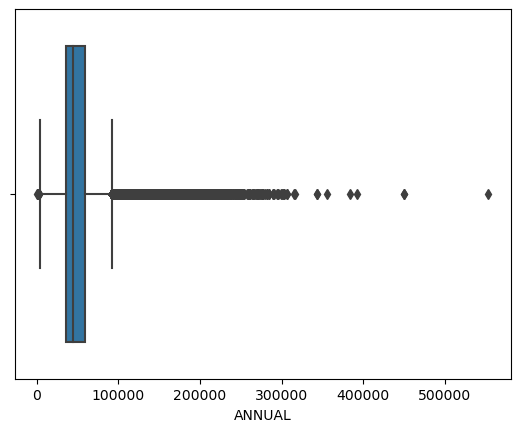

In [4]:
sns.boxplot(x='ANNUAL',data=data)

In [5]:
Q1= data.ANNUAL.quantile(0.25)
print(Q1)
Q3= data.ANNUAL.quantile(0.75)
print(Q3)

36238.08
58389.72


In [6]:
IQR=Q3-Q1
print(IQR)

22151.64


In [7]:
lower_limit= Q1- 1.5*IQR
print(lower_limit)
upper_limit= Q3+ 1.5*IQR
print(upper_limit)

3010.6200000000026
91617.18


In [8]:
upper=data.loc[data['ANNUAL']>upper_limit]
upper

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,07/26/10,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/04,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/12/05,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,12/02/08,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [12]:
lower=data.loc[data['ANNUAL']<lower_limit]
lower

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,02/03/05,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,12/04/19,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,04/12/17,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/08/19,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12/01/17,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
141901,102,HOUSE OF REPRESENTATIVES ...,CUTBIRTH,JOE,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,11/01/18,0.0,20.0,100.00,1200.00,931560,NaN,NaN,NaN,NaN,NaN
142033,102,HOUSE OF REPRESENTATIVES ...,HARRIS,KATHARINE,T,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/13/20,0.0,20.0,250.00,3000.00,1247654,NaN,NaN,NaN,NaN,NaN
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/23/15,0.0,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/14,0.0,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN


In [13]:
data=pd.concat([upper,lower])

In [17]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,07/26/10,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/23/15,0.0000,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/14,0.0000,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN
142282,102,HOUSE OF REPRESENTATIVES ...,PETERSON,BREELY,K,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,10/01/19,0.0000,5.0,150.00,1800.00,1164660,NaN,NaN,NaN,NaN,NaN
142311,102,HOUSE OF REPRESENTATIVES ...,REID,MASON,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/03/19,0.0000,6.0,100.00,1200.00,1164592,NaN,NaN,NaN,NaN,NaN


1.Who are the outliers in the salaries?<br>
Finding the upper_limit and lower_limit and adding outlier data into data dataframe.<br>
so data dataframe comtains outliers of salaries.

In [13]:
# 2.What departments/roles have the biggest wage disparities between managers and employees?

In [14]:
data.ANNUAL.max()

553500.0

In [15]:
data.loc[data['ANNUAL']==553500.0]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,03/01/16,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [16]:
data.ANNUAL.min()

600.0

In [17]:
data.loc[data['ANNUAL']==600]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,10.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


2.What departments/roles have the biggest wage disparities between managers and employees?<br>
* CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS  department is paying highest salary of *$553500.0* to CHIEF SCIENTIFIC OFFICER.

* HOUSE OF REPRESENTATIVES department is paying lowest salary of *$600.0*  to ELECTED OFFICIALS STAFF.

In [19]:
# 3.Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [30]:
data3=data[['AGENCY_NAME','CLASS_TITLE','EMPLOY_DATE','ANNUAL']]

In [31]:
data3

,AGENCY_NAME,CLASS_TITLE,EMPLOY_DATE,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",02/18/88,114549.84
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,02/01/15,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",02/01/20,114549.84
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,09/01/18,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,06/29/20,39411.24
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,10/30/17,34788.00
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,07/13/15,66000.00
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,10/15/12,13447.20
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,09/22/89,68929.92


In [32]:
df1= data3.groupby([ 'AGENCY_NAME','CLASS_TITLE','EMPLOY_DATE'])
df2=df1.first()
df2

ANNUAL
AGENCY_NAME                                        CLASS_TITLE                                        EMPLOY_DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

3.Have salaries and total compensations for some roles/ departments/ head-count changed over time?<br>
Yes<br>
For few CLASS_TITLE with AGENCY_NAME, the salaries are changed over time, but for few salaries haven't changed.